In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (assuming you've already saved the dataset as 'orders_data.csv')
df = pd.read_csv('c:/Users/hp/OneDrive/Documents/projects/orders_data.csv')

In [3]:
# View the first few rows of the dataset
print("Initial Data:")
print(df.head())

Initial Data:
                                user_id                              order_id  \
0  dd304246-5d11-4895-876b-8f7cce15e39e  3adffa81-c898-44c7-b9ae-1813d5892300   
1  b0c2d7fc-57b1-4abe-9327-ed5912fb7ca5  0893d299-396a-40c3-a97c-aad72e02c43a   
2  ffefe754-9190-4097-b45e-0ce77d33daf7  e04f8dbb-b7db-4323-8be9-1d1475dbf657   
3  48478a9d-bf7e-47c2-8c1e-63a377ee667b  2af86523-3fef-4ca8-b95e-143a2f9291e6   
4  e3899f38-fc52-4abf-b2fb-e44008dd3322  6bb75048-55e2-4431-acc3-5fd0c500cd2a   

   order_date item_name item_category   price  quantity offer_applied  \
0  2025-04-09     Salad        Indian  256.00         4           Yes   
1  2024-11-30     Salad    Vegetarian  311.30         4           Yes   
2  2024-10-11     Sushi        Indian  234.36         3           Yes   
3  2024-12-30     Pasta    Vegetarian  217.92         3            No   
4  2025-02-18     Pizza       Italian  258.32         5            No   

          city payment_mode  delivery_time_mins  rating  tot

In [4]:
# Check for basic information (data types, missing values, etc.)
print("\nBasic Info:")
df.info()


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1000 non-null   object 
 1   order_id            1000 non-null   object 
 2   order_date          1000 non-null   object 
 3   item_name           1000 non-null   object 
 4   item_category       1000 non-null   object 
 5   price               1000 non-null   float64
 6   quantity            1000 non-null   int64  
 7   offer_applied       1000 non-null   object 
 8   city                1000 non-null   object 
 9   payment_mode        1000 non-null   object 
 10  delivery_time_mins  1000 non-null   int64  
 11  rating              816 non-null    float64
 12  total_amount        1000 non-null   float64
 13  pre_post_offer      1000 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 109.5+ KB


In [5]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             price     quantity  delivery_time_mins      rating  total_amount
count  1000.000000  1000.000000          1000.00000  816.000000   1000.000000
mean    300.368510     2.936000            54.09000    2.995098    884.048120
std     112.391341     1.391345            21.79796    1.431452    556.629377
min     100.830000     1.000000            15.00000    1.000000    103.450000
25%     206.332500     2.000000            35.00000    2.000000    416.005000
50%     303.160000     3.000000            55.00000    3.000000    774.630000
75%     393.692500     4.000000            72.00000    4.000000   1243.317500
max     499.860000     5.000000            90.00000    5.000000   2472.750000


In [6]:
# 1. Data Cleaning

# Handle missing values (e.g., 'rating' column)
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Handle outliers in the 'price' column (example: remove prices above the 95th percentile)
price_threshold = df['price'].quantile(0.95)
df = df[df['price'] <= price_threshold]

C:\Users\hp\AppData\Local\Temp\ipykernel_872\2938835557.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


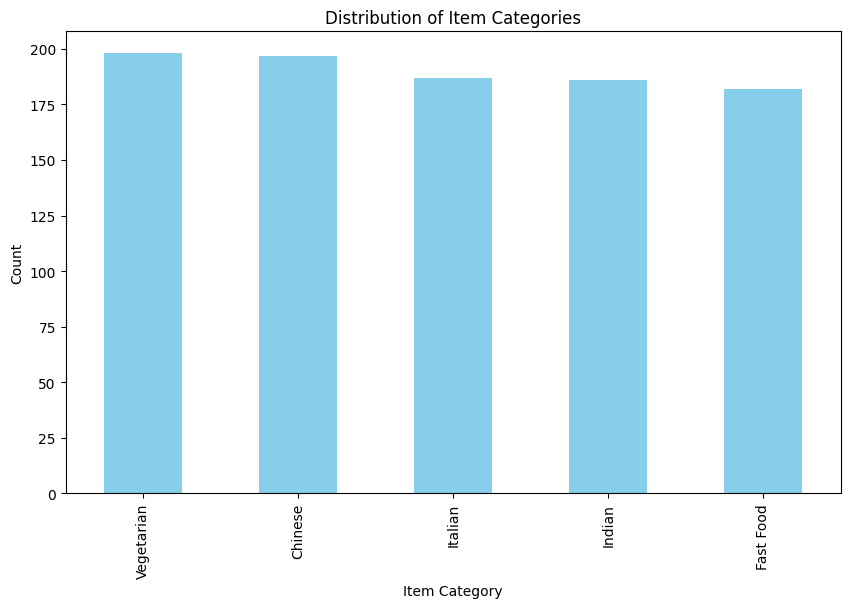

In [7]:
# 2. Univariate Analysis

# Plot distribution of 'item_category' (categorical variable)
plt.figure(figsize=(10, 6))
df['item_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Item Categories')
plt.xlabel('Item Category')
plt.ylabel('Count')
plt.show()

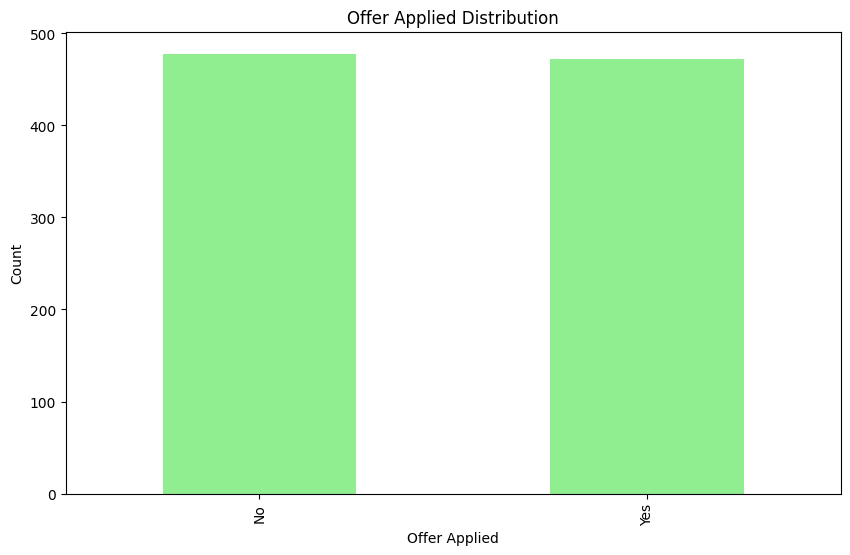

In [8]:
# Plot distribution of 'offer_applied' (categorical variable)
plt.figure(figsize=(10, 6))
df['offer_applied'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Offer Applied Distribution')
plt.xlabel('Offer Applied')
plt.ylabel('Count')
plt.show()

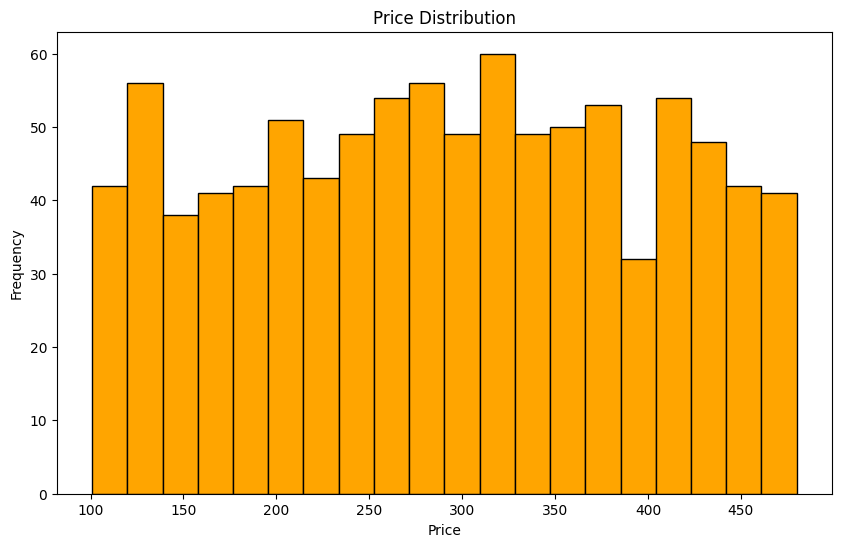

In [9]:
# Plot distribution of 'price' (numerical variable)
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

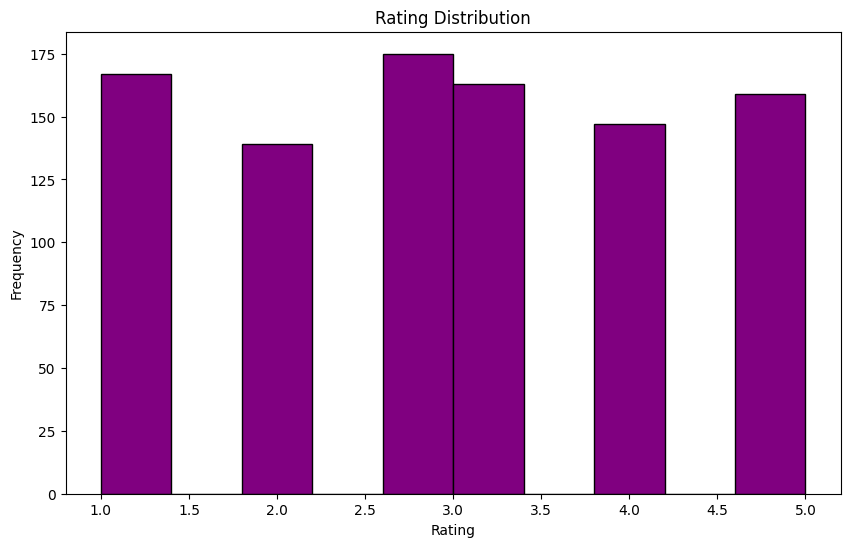

In [10]:
# Plot distribution of 'rating' (numerical variable)
plt.figure(figsize=(10, 6))
df['rating'].plot(kind='hist', bins=10, color='purple', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

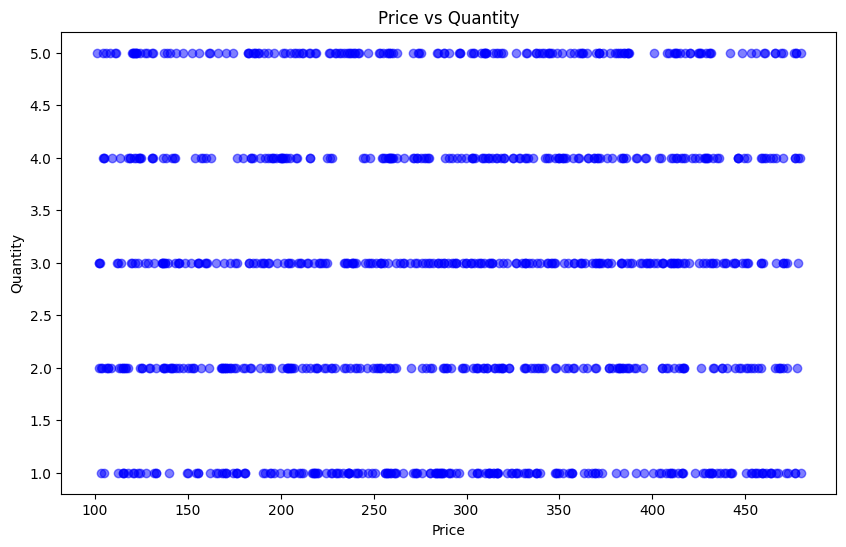

In [11]:
# 3. Bivariate Analysis

# Scatter plot for 'price' vs 'quantity' (numerical variables)
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['quantity'], color='blue', alpha=0.5)
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

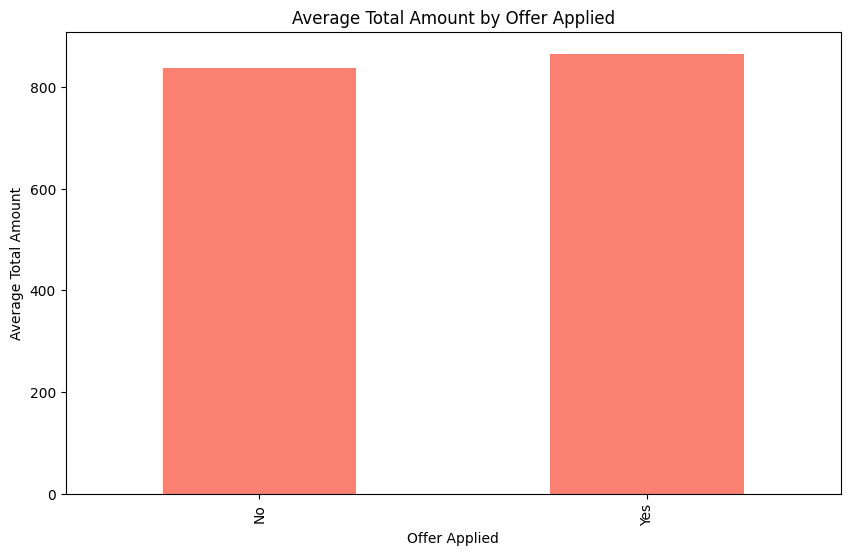

In [12]:
# Average 'total_amount' by 'offer_applied' (categorical vs numerical)
plt.figure(figsize=(10, 6))
df.groupby('offer_applied')['total_amount'].mean().plot(kind='bar', color='salmon')
plt.title('Average Total Amount by Offer Applied')
plt.xlabel('Offer Applied')
plt.ylabel('Average Total Amount')
plt.show()

In [13]:
# Correlation between numerical variables
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                       price  quantity  delivery_time_mins    rating  \
price               1.000000  0.003328           -0.038631 -0.020168   
quantity            0.003328  1.000000           -0.008554  0.006047   
delivery_time_mins -0.038631 -0.008554            1.000000  0.036807   
rating             -0.020168  0.006047            0.036807  1.000000   
total_amount        0.584773  0.764373           -0.035234 -0.005538   

                    total_amount  
price                   0.584773  
quantity                0.764373  
delivery_time_mins     -0.035234  
rating                 -0.005538  
total_amount            1.000000  


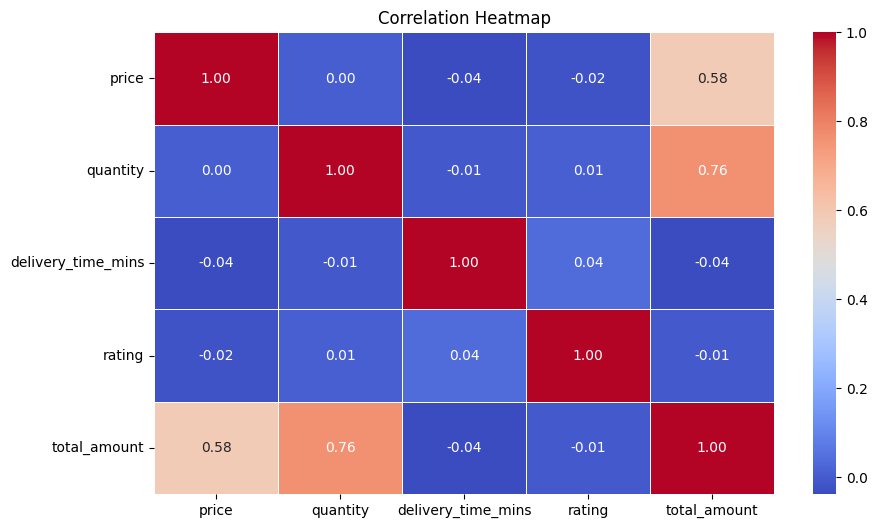

In [14]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

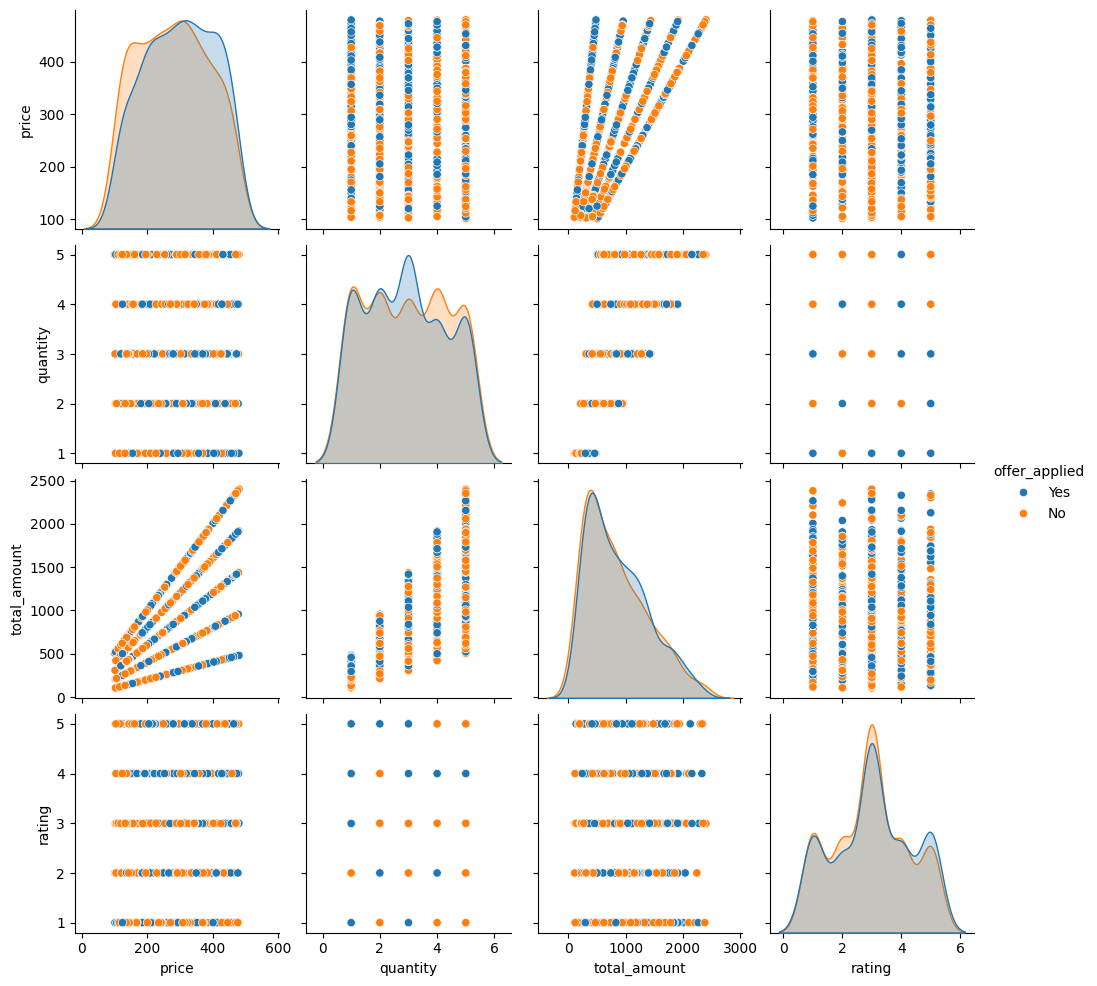

In [15]:
# 4. Multivariate Analysis

# Pairplot for a subset of numerical columns to observe multi-variable relationships
# Include 'offer_applied' in the selected dataframe
sns.pairplot(df[['price', 'quantity', 'total_amount', 'rating', 'offer_applied']], hue='offer_applied')
plt.show()

In [16]:
# Grouping by 'item_category' and summarizing 'total_amount' and 'rating'
category_summary = df.groupby('item_category')[['total_amount', 'rating']].mean()
print("\nItem Category Summary:")
print(category_summary)


Item Category Summary:
               total_amount    rating
item_category                        
Chinese          896.532741  2.943292
Fast Food        910.445220  3.141914
Indian           865.010914  3.004586
Italian          784.816257  2.897478
Vegetarian       798.810707  2.973757


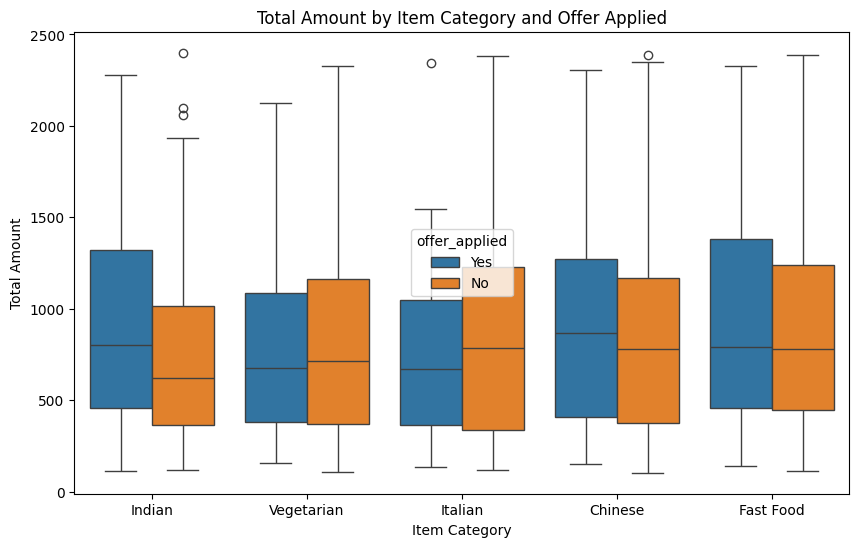

In [17]:
# Boxplot for 'total_amount' by 'offer_applied' and 'item_category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='item_category', y='total_amount', hue='offer_applied', data=df)
plt.title('Total Amount by Item Category and Offer Applied')
plt.xlabel('Item Category')
plt.ylabel('Total Amount')
plt.show()

In [18]:
# 5. Feature Engineering

# Create a new feature 'order_day' which is the day of the week (0=Monday, 6=Sunday)
df['order_day'] = df['order_date'].dt.dayofweek

# Create a new feature 'order_month' which is the month of the year
df['order_month'] = df['order_date'].dt.month

# Create a new feature 'total_amount_discounted' (apply a 10% discount to orders with offers)
df['total_amount_discounted'] = df.apply(lambda row: row['total_amount'] * 0.9 if row['offer_applied'] == 'Yes' else row['total_amount'], axis=1)

# Display the new features
print("\nData with New Features:")
print(df[['order_day', 'order_month', 'total_amount_discounted']].head())


Data with New Features:
   order_day  order_month  total_amount_discounted
0          2            4                  921.600
1          5           11                 1120.680
2          4           10                  632.772
3          0           12                  653.760
4          1            2                 1291.600



Outliers in Price (Z-score > 3):
Empty DataFrame
Columns: [order_id, price, price_zscore]
Index: []


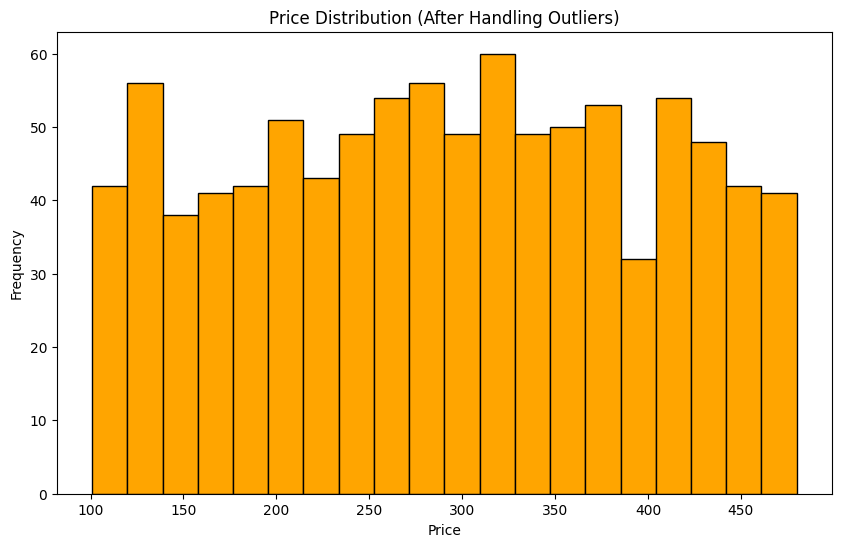

In [19]:
# 6. Advanced EDA (Outlier Detection & More)

# Outlier detection using Z-score for 'price'
from scipy.stats import zscore

df['price_zscore'] = zscore(df['price'])
df_outliers = df[df['price_zscore'].abs() > 3]  # Outliers are rows where Z-score > 3
print(f"\nOutliers in Price (Z-score > 3):")
print(df_outliers[['order_id', 'price', 'price_zscore']])

# Distribution of 'price' after handling outliers (Z-score method)
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Price Distribution (After Handling Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [22]:
df.to_csv('cleaned_orders_data.csv', index = False)